In [3]:
import os

import numpy as np
import operator
#from termcolor import colored
import pandas as pd

import nltk
from nltk.corpus import stopwords
#set(stopwordswords.words('english'))
from spacy.lang.en import English
nlp = English()
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

import re

import string



from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [4]:
pos_directory = 'reviews_dataset/pos/'
neg_directory = 'reviews_dataset/neg/'

In [5]:
# train 
import os

positive_corpus = []
for filename in os.listdir(pos_directory):
    #print(type(filename))
    with open('reviews_dataset/pos/{}'.format(filename), 'r') as f:
        line = f.read()
        positive_corpus.append(line)

In [6]:
# test
import os

negitive_corpus = []
for filename in os.listdir(neg_directory):
    #print(filename)
    with open('reviews_dataset/neg/{}'.format(filename), 'r') as d:
        line = d.read()
        negitive_corpus.append(line)

In [8]:
df_pos = pd.DataFrame(positive_corpus, columns=['pos_text'])
df_pos['label'] = 1

In [9]:
df_neg = pd.DataFrame(negitive_corpus, columns=['neg_text'])
df_neg['label'] = 0

In [10]:
df_pos.columns = ['text', 'label']
df_neg.columns = ['text', 'label']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer 
stopwords = nltk.corpus.stopwords.words('english')
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)
 


In [105]:
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)

def tfidf_vec(df):
    tfidf_vectors = tfidf_vectorizer.fit_transform(df)
    return tfidf_vectors

In [13]:
df_all = df_pos.append(df_neg)
df_all.index = range(len(df_all['text']))
df_all

,text,label
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",0
1996,"john boorman's "" zardoz "" is a goofy cinematic...",0
1997,the kids in the hall are an acquired taste . \...,0
1998,there was a time when john carpenter was a gre...,0


In [106]:
X = tfidf_vec(df_all['text'])
y = df_all['label'].values

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [108]:
#tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)
def predict_review(text, algo_obj):
    clean_text = text.strip()
    transformed = tfidf_vectorizer.transform([clean_text])
    if algo_obj.predict(transformed) ==1:
        return "It's a positive review"
    else: 
        return "It's a negitive review"
    
    
def accuracy_metrics(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

In [ ]:
#Naive Bayes

In [109]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)


In [17]:
# Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [100, 500, 800],
    'max_features': ['auto'],
    'max_depth' : [8, 9],
    'criterion' :['gini']
}

In [ ]:
%%time
CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_params_

In [110]:
random_classifier = RandomForestClassifier(n_estimators = 1000, max_depth = 8, random_state = 42, criterion = 'gini')
random_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
forest_pred = random_classifier.predict(x_test)

In [ ]:
#Logistic regression

In [111]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
log_pred = reg.predict(x_test)

In [19]:
#metric scores

In [25]:
naive_bayes = (accuracy_metrics(y_test, nb_pred))*100
random_forest = (accuracy_metrics(y_test, forest_pred))*100
logistic_regression = (accuracy_metrics(y_test, log_pred))*100

In [34]:
algorithms = ['Naive Bayes', 'Random Forest', 'Logistic Regression']
metrics = [naive_bayes, random_forest, logistic_regression]

In [37]:
list_zip = list(zip(algorithms, metrics))

In [41]:
metrics_df = pd.DataFrame(list_zip, columns=['algorithms', 'metrics'])

In [42]:
#metrics_df = pd.DataFrame(metrics, index=['naive_bayes', 'random_forest','logistic_regression'], columns=['metrics'])

Text(0, 0.5, 'Metrics')

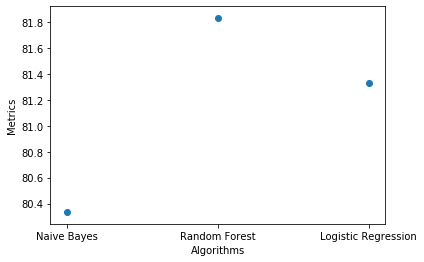

In [48]:
plt.scatter(metrics_df['algorithms'], metrics_df['metrics'])
plt.xlabel('Algorithms')
plt.ylabel('Metrics')

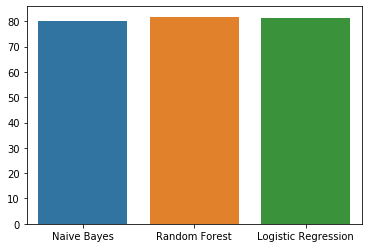

In [45]:
sns.barplot(x = algorithms, y = metrics, data = metrics_df)

In [51]:
# McNemar test
from statsmodels.stats.contingency_tables import mcnemar

In [ ]:
#null_hypothesis = 'Both random forest and logistic regression gives us the exact same results'
#alternate_hypothesis = "Both random forest and logistic regression don't give us the exact same results"

In [90]:
mcnemar_table = list([forest_pred, log_pred])

In [123]:
result = mcnemar(mcnemar_table, exact=True)
result.pvalue

1.0

In [122]:
alpha = 0.05
if result.pvalue > alpha:
    print("Fail to reject null hypothesis")
else: 
    print("Reject null hypothesis")

Fail to reject null hypothesis


In [112]:
predict_review("The acting, cinematography, sound design, and the script itself is phenomenal. This movie is a triumph. Joaquin Pheonix deserves an Oscar win for this tbh.", random_classifier)

"It's a positive review"

In [117]:
predict_review("Saaho is a missed opportunity with a juvenile narrative and weak story line", random_classifier)

"It's a positive review"

In [118]:
predict_review("Saaho is a missed opportunity with a juvenile narrative and weak story line", reg)

"It's a negitive review"

In [119]:
predict_review("Shah Rukh Khan is especially entertaining in the first half while the script stays on track. But in the end it feels as if the makers threw everything at the wall and decided to see what sticks.", reg)

"It's a negitive review"

In [120]:
predict_review("Shah Rukh Khan is especially entertaining in the first half while the script stays on track. But in the end it feels as if the makers threw everything at the wall and decided to see what sticks.", random_classifier)

"It's a positive review"